In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from datetime import datetime
import numpy as np
import pandas as pd
from icecream import ic

ar = np.arange(5)
indiciesWorking = np.argwhere(ar==3)
print(indiciesWorking)

[[3]]


In [19]:
import pandas as pd
df = pd.read_excel(r'C:\Users\basti\PythonScripts\Investment_analysis\data\MSCIWORLD.xlsx', sheet_name='IE00BJ0KDQ92', skiprows=13)

# Display the dataframe
# print(df)

# # Access specific columns
print(df.columns)
dates = df['Date'].values
print(type(dates))
#Iterate through rows
# for index, row in df.iterrows():
#     print(row['Date'])

Index(['Date', 'NAV', 'Index Level'], dtype='object')
<class 'numpy.ndarray'>


In [27]:
a = {'a':1,'b':2,'c':3}
for i,j in a.items():
    print(i,j)
print(sum(a.values()))
a = [2,3,4]
a[2] = 3
print(a)

a 1
b 2
c 3
6
[2, 3, 3]


In [2]:
from data.file_loading import DATE_FORMAT
from investmentclasses import Investment
from dataclasses import dataclass
from datetime import datetime, timedelta

def generate_dates(start_date:str, end_date:str):
    start_date = datetime.strptime(start_date, DATE_FORMAT)
    end_date = datetime.strptime(end_date, DATE_FORMAT)
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += timedelta(days=1)

st= '13.06.2024'
en = '16.08.2024'
for date in generate_dates(st, en):
    print(date.day)

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [4]:
round(156.489)

156

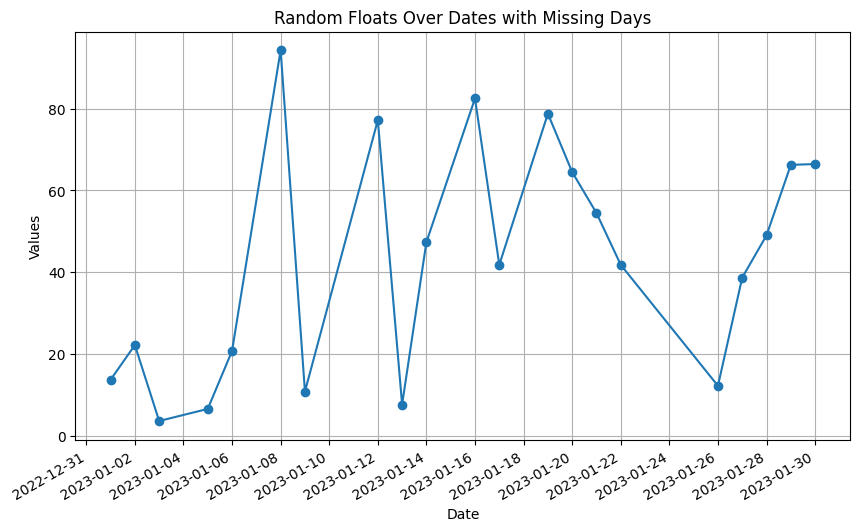

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Step 1: Define the date range and missing days
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30)
missing_days = {4, 7, 10, 11, 15, 18, 23, 24, 25}

# Create the list of dates with the missing days removed
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1) if (i + 1) not in missing_days]

# Step 2: Generate the corresponding random float values
floats = np.random.rand(len(dates)) * 100  # random floats between 0 and 100

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, floats, marker='o', linestyle='-')

# Formatting the date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Random Floats Over Dates with Missing Days')
plt.grid(True)
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()


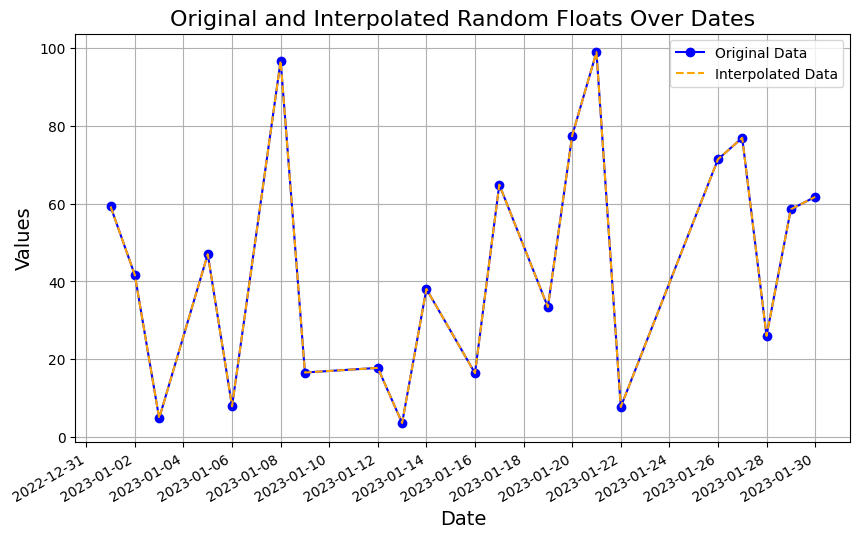

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

# Define the date range and missing days
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30)
missing_days = {4, 7, 10, 11, 15, 18, 23, 24, 25}

# Create the list of dates with the missing days removed
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1) if (i + 1) not in missing_days]

# Generate the corresponding random float values
floats = np.random.rand(len(dates)) * 100  # random floats between 0 and 100

# Create the full list of dates
full_dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Convert datetime to float days for interpolation
date_nums = mdates.date2num(dates)
full_date_nums = mdates.date2num(full_dates)

# Perform interpolation
interp_func = interp1d(date_nums, floats, kind='linear', fill_value="extrapolate")
interpolated_floats = interp_func(full_date_nums)

# Plot the data
plt.figure(figsize=(10, 6))

# Original data
plt.plot(dates, floats, marker='o', linestyle=None, color='blue', label='Original Data')

# Interpolated data
plt.plot(full_dates, interpolated_floats, linestyle='--', color='orange', label='Interpolated Data')

# Formatting the date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Original and Interpolated Random Floats Over Dates', fontsize=16)
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()


In [5]:
from data.file_loading import load_msci_em, extrapolate_missing_dates
import matplotlib.dates as mdates
from scipy.interpolate import interp1d
from datetime import datetime, timedelta

data = load_msci_em()


In [8]:
dates, prices = data
print(dates)

[datetime.datetime(2024, 6, 13, 0, 0) datetime.datetime(2024, 6, 12, 0, 0)
 datetime.datetime(2024, 6, 11, 0, 0) ...
 datetime.datetime(2014, 7, 24, 0, 0) datetime.datetime(2014, 7, 23, 0, 0)
 datetime.datetime(2014, 7, 22, 0, 0)]


In [10]:
print(range((dates[0] - dates[-1]).days + 1))

range(0, 3615)


In [15]:
full_dates = [dates[-1] + timedelta(days=i) for i in range((dates[0] - dates[-1]).days + 1)]
full_date_nums = mdates.date2num(full_dates)
print(full_dates)
print(full_date_nums)

[datetime.datetime(2014, 7, 22, 0, 0), datetime.datetime(2014, 7, 23, 0, 0), datetime.datetime(2014, 7, 24, 0, 0), datetime.datetime(2014, 7, 25, 0, 0), datetime.datetime(2014, 7, 26, 0, 0), datetime.datetime(2014, 7, 27, 0, 0), datetime.datetime(2014, 7, 28, 0, 0), datetime.datetime(2014, 7, 29, 0, 0), datetime.datetime(2014, 7, 30, 0, 0), datetime.datetime(2014, 7, 31, 0, 0), datetime.datetime(2014, 8, 1, 0, 0), datetime.datetime(2014, 8, 2, 0, 0), datetime.datetime(2014, 8, 3, 0, 0), datetime.datetime(2014, 8, 4, 0, 0), datetime.datetime(2014, 8, 5, 0, 0), datetime.datetime(2014, 8, 6, 0, 0), datetime.datetime(2014, 8, 7, 0, 0), datetime.datetime(2014, 8, 8, 0, 0), datetime.datetime(2014, 8, 9, 0, 0), datetime.datetime(2014, 8, 10, 0, 0), datetime.datetime(2014, 8, 11, 0, 0), datetime.datetime(2014, 8, 12, 0, 0), datetime.datetime(2014, 8, 13, 0, 0), datetime.datetime(2014, 8, 14, 0, 0), datetime.datetime(2014, 8, 15, 0, 0), datetime.datetime(2014, 8, 16, 0, 0), datetime.datetime(20

In [16]:
date_nums = mdates.date2num(dates)
interp_func = interp1d(date_nums, prices, kind='linear', fill_value="extrapolate")
interpolated_prices = interp_func(full_date_nums)
print(interpolated_prices)

[ 46.2047  46.2793  46.3481 ... 109.7598 110.9131 110.5388]


In [27]:
from investmentclasses import Share
share_world = Share('msciworld', 0.7)
share_em = Share('msciem', 0.3)
from propagation import Portfolio
assets = [share_world, share_em]
portfolio = Portfolio(assets, initial_cash=10000)
portfolio.simulate_timeinterval('01.01.2018', '01.01.2024')

10000
msciworld 0.0
msciem 0.0
msciworld 0.0
msciem 0.0
pre buy msciworld -117.5909708948908 0
post buy msciworld -117.5909708948908 117.57417218476296
pre buy msciem -56.889207131327595 0
post buy msciem -56.889207131327595 56.870244062283824
4.0
msciworld 6981.930581682216
msciem 2743.7636907037477
pre sell msciworld 2.8820371925399946 117.57417218476296
post sell msciworld 2.8820371925399946 114.69213499222296
msciworld 6810.785990670175
msciem 2743.7636907037477
pre buy msciworld -0.0012330503901837194 114.69213499222296
post buy msciworld -0.0012330503901837194 114.67652826301217
pre buy msciem -3.630888592720478 56.870244062283824
post buy msciem -3.630888592720478 60.480405562414305
4.000000000001961
msciworld 6189.413324633903
msciem 2660.3467610414727
pre sell msciem 0.09590885969873454 60.480405562414305
post sell msciem 0.09590885969873454 60.38449670271557
msciworld 6189.413324633903
msciem 2656.1280257026137
pre buy msciworld -0.15499562953141052 114.67652826301217
post bu

[10000.0 10020.482406873012 10068.96070301142 ... 14266.595230435625
 14240.269094838393 14213.94295924116]


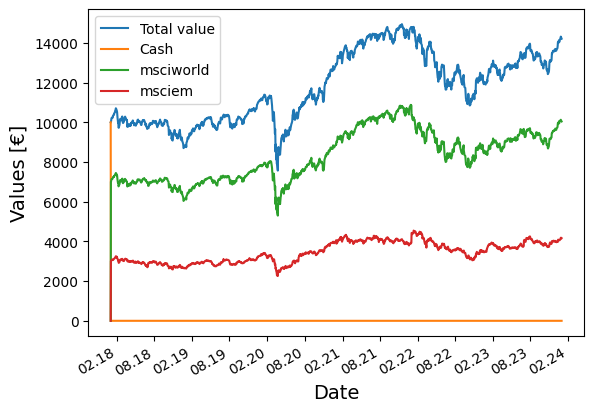

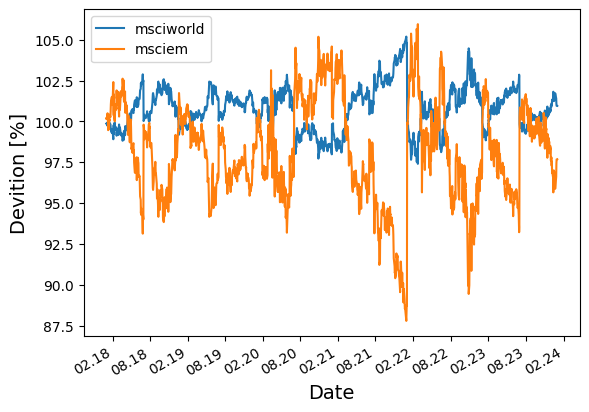

In [36]:
from visualisation import *
plot_value_history(portfolio)
plot_deviation_history(portfolio)


[10000.0 10020.482406873012 10068.96070301142 ... 14266.595230435625
 14240.269094838393 14213.94295924116]


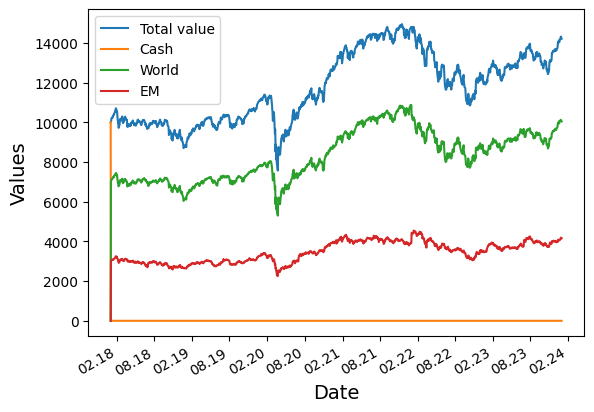

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
hist = np.array(portfolio.portfolio_history).T
print(hist[1:].sum(axis=0))
plt.figure()
plt.plot(hist[0], hist[1:].sum(axis=0), label='Total value')
plt.plot(hist[0], hist[1], label='Cash')
plt.plot(hist[0], hist[2], label='World')
plt.plot(hist[0], hist[3], label='EM')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m.%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()

In [9]:
import datetime

class TimeTrigger:
    def __init__(self, reference_date: datetime.date, time_unit='months', time_interval: int = 6) -> None:
        self.time_unit = time_unit
        self.time_interval = time_interval
        self.reference_date = reference_date

    def check_for_rebalance(self, date: datetime.date) -> bool:
        # Calculate the difference in the specified time unit
        
        if self.time_unit == 'days':
            delta_days = (date - self.reference_date).days
            return delta_days % self.time_interval == 0
        
        elif self.time_unit == 'weeks':
            delta_weeks = (date - self.reference_date).days / 7
            return delta_weeks % self.time_interval == 0
    
        elif self.time_unit == 'months':
            if date.day != self.reference_date.day:
                return False
            delta_months = (date.year - self.reference_date.year) * 12 + (date.month - self.reference_date.month)
            return delta_months % self.time_interval == 0

        elif self.time_unit == 'years':
            if date.day != self.reference_date.day:
                return False
            if date.month != self.reference_date.month:
                return False
            delta_years = date.year - self.reference_date.year
            return delta_years % self.time_interval == 0

        else:
            raise ValueError("Invalid time unit. Please use 'days', 'weeks', 'months', or 'years'.")

# Example usage:
reference_date = datetime.date(2024, 1, 1)
trigger = TimeTrigger(reference_date, time_unit='years', time_interval=1)

# Check if rebalancing is needed on 2024-07-01
date_to_check = datetime.date(2023, 1, 1)
print(trigger.check_for_rebalance(date_to_check))  # Should print True or False based on the time unit and interval


True


In [10]:
class Port:
    def __init__(self, bal) -> None:
        self.bal = bal
        self.vlue = 500
        self.lst = []

    def change(self, ad):
        self.bal.adjust(ad, self)

class Balance:

    def adjust(self, ad, port:Port):
        port.vlue += ad
        port.lst.append(ad)
        

b = Balance()
p = Port(b)
print(p.vlue, p.lst)
p.change(4)
print(p.vlue, p.lst)

500 []
504 [4]


In [32]:
open_orders = [1,2,3,4,5,6,7]

blank = pd.DataFrame(data = np.zeros((len(open_orders),4)), columns=['lower_bound', 'upper_bound', 'slope', 'starting_value'])
# ic(blank)
blank.loc[:,'lower_bound'] = 2
blank.loc[1,'lower_bound'] = 3
blank.loc[:,'upper_bound'] = 2.5
blank.loc[1,'upper_bound'] = 3.5
ic(blank)
up_mask = blank['upper_bound']>3.25
low_mask = blank['lower_bound']<3.25
ic(up_mask,low_mask)
com_mask = (up_mask)&(low_mask)
ic(com_mask)
row = blank[com_mask]
ic(len(row))
ic(row['starting_value'])



ic| blank:    lower_bound  upper_bound  slope  starting_value
           0          2.0          2.5    0.0             0.0
           1          3.0          3.5    0.0             0.0
           2          2.0          2.5    0.0             0.0
           3          2.0          2.5    0.0             0.0
           4          2.0          2.5    0.0             0.0
           5          2.0          2.5    0.0             0.0
           6          2.0          2.5    0.0             0.0
ic| up_mask: 0    False
             1     True
             2    False
             3    False
             4    False
             5    False
             6    False
             Name: upper_bound, dtype: bool
    low_mask: 0    True
              1    True
              2    True
              3    True
              4    True
              5    True
              6    True
              Name: lower_bound, dtype: bool
ic| com_mask: 0    False
              1     True
              2    False
    

1    0.0
Name: starting_value, dtype: float64

In [34]:
i = [1,2]
for j in i[1:]:
    print(j)

2
